# Εργασία 2 - Δέντρα Απόφασης & Τυχαία Δάση

Ονοματεπώνυμο: Καρλάκη Μαρία ΑΕΜ:244

Εισαγωγή βιβλιοθηκών

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier

Εισαγωγή του αρχείου

In [46]:
df = pd.read_csv('water_potability.csv')

Περιγραφή των δεδομένων

In [47]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


Ιστόγραμμα για κάθε χαρακτηριστικό

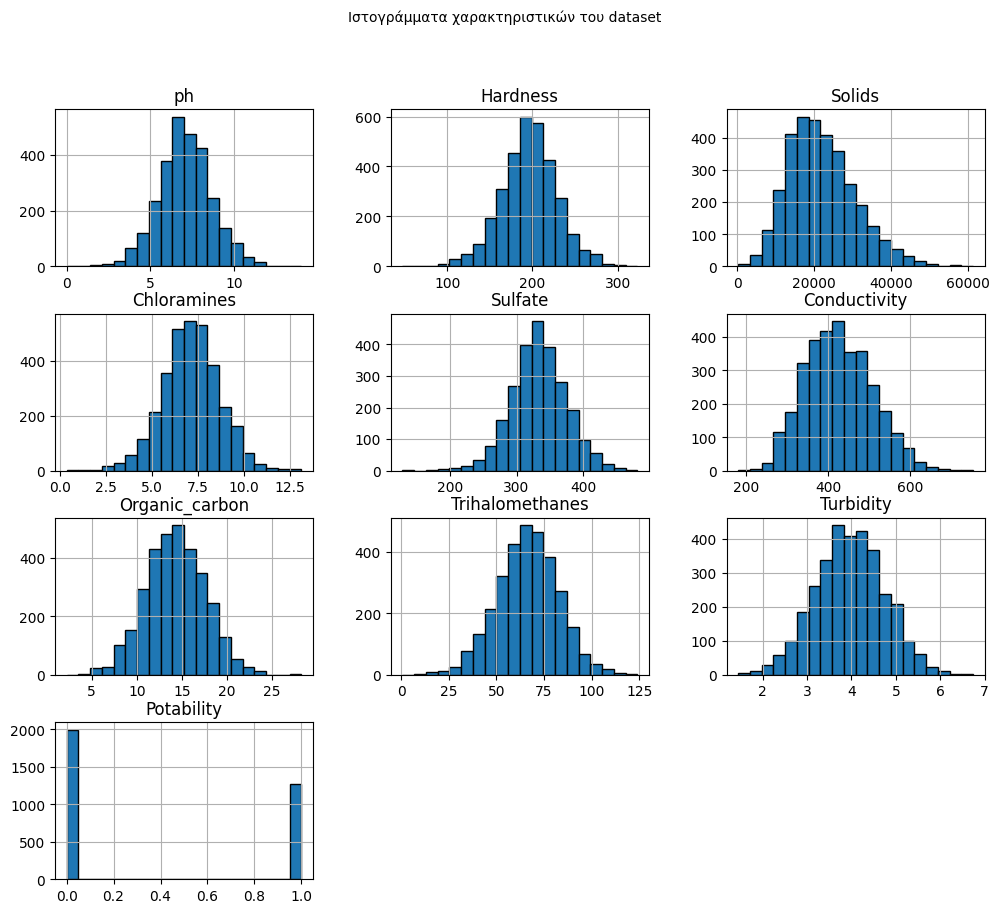

In [48]:
df.hist(figsize=(12, 10), bins=20, edgecolor='black')
plt.suptitle('Ιστογράμματα χαρακτηριστικών του dataset', fontsize=10)
plt.show()

Ραβδόγραμμα για τη μεταβλητή Potability

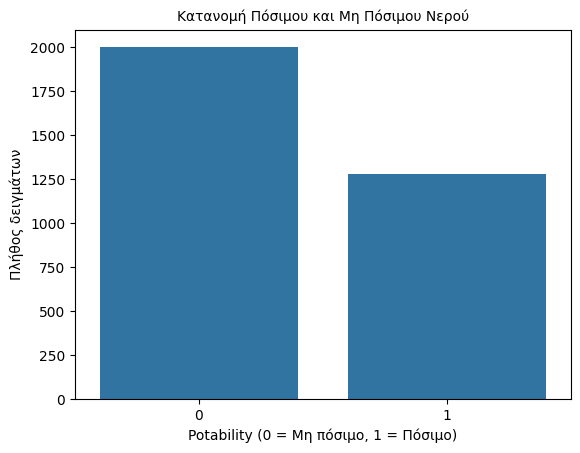

In [49]:
sns.countplot(x='Potability', data=df)
plt.title('Κατανομή Πόσιμου και Μη Πόσιμου Νερού', fontsize=10)
plt.xlabel('Potability (0 = Μη πόσιμο, 1 = Πόσιμο)')
plt.ylabel('Πλήθος δειγμάτων')
plt.show()

Πλήθος ελλειπών τιμών ανά χαρακτηριστικό

In [50]:
missing_values = df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_table = pd.DataFrame({
    'Ελλειπείς Τιμές': missing_values,
    'Ποσοστό (%)': missing_percent.round(2)
})
print(missing_table)

                 Ελλειπείς Τιμές  Ποσοστό (%)
ph                           491        14.99
Hardness                       0         0.00
Solids                         0         0.00
Chloramines                    0         0.00
Sulfate                      781        23.84
Conductivity                   0         0.00
Organic_carbon                 0         0.00
Trihalomethanes              162         4.95
Turbidity                      0         0.00
Potability                     0         0.00


Ποσοστά πόσιμου και μη πόσιμου νερού

In [51]:
counts = df['Potability'].value_counts()
percentages = df['Potability'].value_counts(normalize=True) * 100
print("Πλήθος δειγμάτων (0 = Μη πόσιμο, 1 = Πόσιμο):\n", counts)
print("\nΠοσοστά πόσιμου και μη-πόσιμου νερού:\n", percentages)

Πλήθος δειγμάτων (0 = Μη πόσιμο, 1 = Πόσιμο):
 Potability
0    1998
1    1278
Name: count, dtype: int64

Ποσοστά πόσιμου και μη-πόσιμου νερού:
 Potability
0    60.989011
1    39.010989
Name: proportion, dtype: float64


Παρατηρήσεις

Από τα παραπάνω είδαμε ότι από τα δέκα χαρακτηριστικά, τα τρία: pH, Sulfate και Trihalomethanes  έχουν ελλιπείς τιμές και συγκεκριμένα πλήθους 491, 781 και 162 αντίστοιχα. Επειδή συνολικά διαθέτουμε 3276 δείγματα, για τις στήλες pH και Trihalomethanes το ποσοστό των ελλείψεων (15% και 5%) δεν θεωρείται ιδιαίτερα προβληματικό. Όμως για το χαρακτηριστικό Sulfate που φτάνει το 24% θα πρέπει να το λάβουμε υπόψη και να ακολουθήσουμε είτε συμπλήρωση με στατικές μεθόδους (πχ μέση ή διάμεση τιμή) είτε κατάλληλο καθαρισμό των δεδομένων πριν από οποιαδήποτε περαιτέρω ανάλυση. Επιπλέον υπάρχει σχετικά μικρή ανισορροπία ανάμεσα στα παραδείγματα πόσιμου (39%) και μη πόσιμου (61%) νερού, όπου επίσης πρέπει να ληφθεί υπόψη για να αποφευχθεί η μεροληψία του μοντέλου υπέρ της πλειοψηφούσας κατηγορίας. Συνολικά τα δεδομένα κρίνονται μέτριας ποιότητας και απαιτούν προεπεξεργασία, όπως καθαρισμό, συμπλήρωση των ελλειπών τιμών και ενδεχομένως εξισορρόπηση των κατηγοριών (πχ με υποδειγματοληψία της πλειοψηφούσας ή υπερδειγματοληψία της μειοψηφούσας κατηγορίας) πριν χρησιμοποιηθούν για περαιτέρω ανάλυση ή εκπαίδευση μοντέλου.

# Ερώτημα 2 - Ανάλυση pH σε σχέση με την ποσιμότητα

In [52]:
df_ph = df.dropna(subset=['ph'])

low_ph = df_ph[df_ph['ph'] < 6.5]
normal_ph = df_ph[(df_ph['ph'] >= 6.5) & (df_ph['ph'] <= 8.5)]
high_ph = df_ph[df_ph['ph'] > 8.5]

def ph_potability_info(subset, label):
    total = len(subset)
    potable = subset['Potability'].sum()
    non_potable = total - potable
    print(f"\nΚατηγορία {label}:")
    print(f"Σύνολο δειγμάτων: {total}")
    if total > 0:
        print(f"Πόσιμο: {potable} ({potable/total*100:.2f}%)")
        print(f"Μη πόσιμο: {non_potable} ({non_potable/total*100:.2f}%)")
    else:
        print("Δεν υπάρχουν δείγματα σε αυτή την κατηγορία")

ph_potability_info(low_ph, "pH < 6.5")
ph_potability_info(normal_ph, "6.5 ≤ pH ≤ 8.5")
ph_potability_info(high_ph, "pH > 8.5")


Κατηγορία pH < 6.5:
Σύνολο δειγμάτων: 968
Πόσιμο: 356 (36.78%)
Μη πόσιμο: 612 (63.22%)

Κατηγορία 6.5 ≤ pH ≤ 8.5:
Σύνολο δειγμάτων: 1328
Πόσιμο: 583 (43.90%)
Μη πόσιμο: 745 (56.10%)

Κατηγορία pH > 8.5:
Σύνολο δειγμάτων: 489
Πόσιμο: 162 (33.13%)
Μη πόσιμο: 327 (66.87%)


Παρατήρηση

Σύμφωνα με τα αποτελέσματα για τιμές του pH μικρότερες από 6.5 υπάρχουν 968 δείγματα, εκ των οποίων 36.78% είναι πόσιμα και 63.22% είναι μη πόσιμα. Για τιμές 6.5 ≤ pH ≤ 8.5 που αντιστοιχούν στο προτεινόμενο εύρος του Παγκόσμιου Οργανισμού Υγείας, υπάρχουν 1328 δείγματα με 43.90% πόσιμα και 56.10% μη πόσιμα. Ενώ για pH μεγαλύτερο από 8.5 εντοπίζονται 489 δείγματα, από τα οποία 33.13% είναι πόσιμα και 66.87% μη πόσιμα. Επομένως επαληθεύεται μερικώς από τα δεδομένα ότι στο εύρος 6.5 - 8.5 παρατηρείται μεγαλύτερο ποσοστό πόσιμου νερού, όμως το ποσοστό των μη πόσιμων δειγμάτων παραμένει υψηλότερο. Αυτό υποδηλώνει ότι ο παράγοντας pH αν και σχετίζεται με την ποιότητα του νερού δεν είναι από μόνος του επαρκής για να την καθορίσει με ακρίβεια, καθώς το αποτέλεσμα πιθανόν να επηρεάζεται και από άλλους χημικούς παράγοντες.

# Ερώτημα 3

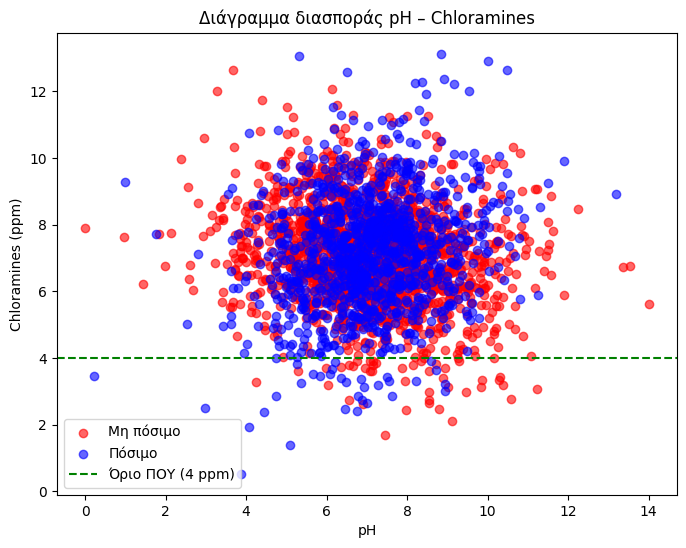

In [53]:
potable = df[df['Potability'] == 1]
non_potable = df[df['Potability'] == 0]

plt.figure(figsize=(8,6))
plt.scatter(non_potable['ph'], non_potable['Chloramines'], color='red', alpha=0.6, label='Μη πόσιμο')
plt.scatter(potable['ph'], potable['Chloramines'], color='blue', alpha=0.6, label='Πόσιμο')
plt.axhline(y=4, color='green', linestyle='--', label='Όριο ΠΟΥ (4 ppm)')

plt.xlabel('pH')
plt.ylabel('Chloramines (ppm)')
plt.title('Διάγραμμα διασποράς pH – Chloramines')
plt.legend()
plt.show()


Με βάση το διάγραμμα διασποράς η διαχωρισιμότητα των παραδειγμάτων είναι χαμηλή, καθώς παρατηρείται σημαντική επικάλυψη μεταξύ των δειγμάτων πόσιμου (μπλε) και μη πόσιμου (κόκκινου) νερού. Η ανάλυση δείχνει ότι δεν υπάρχει σαφές όριο που να διαχωρίζει με ακρίβεια τις δύο κατηγορίες με βάση μόνο τις μεταβλητές pH και Chloramines. Αυτό υποδηλώνει ότι η ποσιμότητα δεν εξαρτάται αποκλειστικά από αυτές τις δύο παραμέτρους, αλλά επηρεάζεται και από άλλους χημικούς παράγοντες που συμβάλλουν στη συνολική ποιότητα του νερού.

# Ερώτημα 4 - Αντιμετώπιση των ελλειπών τιμών

In [54]:
df['ph'] = df['ph'].fillna(df['ph'].mean())
df['Sulfate'] = df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes'] = df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

print(df.isnull().sum())

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64


# Ερώτημα 5

In [55]:
X = df.drop('Potability', axis=1).values
y = df['Potability'].values

Διαχωρισμός σε train και test sets

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2293, 9), (2293,), (983, 9), (983,))

#Ερώτημα 6

Δημιουργία και εκπαίδευση του μοντέλου

In [57]:
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

Υπολογισμός ακρίβειας

In [60]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Ακρίβεια στο train set: {acc_train:.4f}")
print(f"Ακρίβεια στο test set: {acc_test:.4f}")

Ακρίβεια στο train set: 1.0000
Ακρίβεια στο test set: 0.5748


Τα αποτελέσματα δείχνουν ακρίβεια 100% στο train set και 57.48% στο test set. Η πολύ υψηλή απόδοση στα δεδομένα εκπαίδευσης, σε συνδυασμό με τη σημαντικά χαμηλότερη ακρίβεια στα δεδομένα ελέγχου, υποδηλώνει ότι το μοντέλο έχει υποστεί υπερπροσαρμογή (overfitting). Με άλλα λόγια το δέντρο έχει απομνημονεύσει πλήρως τα παραδείγματα του συνόλου εκπαίδευσης, χωρίς όμως να μπορεί να γενικεύσει αποτελεσματικά σε νέα και άγνωστα δεδομένα. Για το λόγο αυτό απαιτείται κατάλληλη ρύθμιση όπως τον περιορισμό του μέγιστου βάθους ή του ελάχιστου αριθμού δειγμάτων ανά φύλλο, προκειμένου να μειωθεί η πολυπλοκότητα του δέντρου και να βελτιωθεί η ικανότητα γενίκευσης του ταξινομητή.

#Ερώτημα 7

Ορισμός των συνδιασμών

In [61]:
criteria = ['gini', 'entropy']
max_depths = [None, 3, 5]
min_samples_splits = [2, 5]
min_samples_leafs = [1, 2]
max_features_list = [None, 'sqrt']
ccp_alphas = [0, 0.01]

In [62]:
results = []

for criterion in criteria:
    for max_depth in max_depths:
        for min_samples_split in min_samples_splits:
            for min_samples_leaf in min_samples_leafs:
                for max_features in max_features_list:
                    for ccp_alpha in ccp_alphas:

                        model = DecisionTreeClassifier(
                            criterion=criterion,
                            max_depth=max_depth,
                            min_samples_split=min_samples_split,
                            min_samples_leaf=min_samples_leaf,
                            max_features=max_features,
                            ccp_alpha=ccp_alpha,
                            random_state=0
                        )
                        model.fit(X_train, y_train)
                        train_acc = accuracy_score(y_train, model.predict(X_train))
                        test_acc = accuracy_score(y_test, model.predict(X_test))

                        results.append({
                            'criterion': criterion,
                            'max_depth': max_depth,
                            'min_samples_split': min_samples_split,
                            'min_samples_leaf': min_samples_leaf,
                            'max_features': max_features,
                            'ccp_alpha': ccp_alpha,
                            'train_acc': train_acc,
                            'test_acc': test_acc
                        })
results_df = pd.DataFrame(results)
pd.set_option('display.max_rows', None)
results_df.sort_values(by='test_acc', ascending=False)

,criterion,max_depth,min_samples_split,min_samples_leaf,max_features,ccp_alpha,train_acc,test_acc
92,entropy,5.0,5,2,None,0.00,0.671173,0.655137
84,entropy,5.0,2,2,None,0.00,0.671173,0.655137
80,entropy,5.0,2,1,None,0.00,0.671609,0.654120
88,entropy,5.0,5,1,None,0.00,0.671609,0.654120
36,gini,5.0,2,2,None,0.00,0.662015,0.643947
44,gini,5.0,5,2,None,0.00,0.662015,0.642930
32,gini,5.0,2,1,None,0.00,0.662887,0.641913
40,gini,5.0,5,1,None,0.00,0.662015,0.641913
64,entropy,3.0,2,1,None,0.00,0.641082,0.639878
68,entropy,3.0,2,2,None,0.00,0.641082,0.639878


#Ερώτημα 8

Εύρεση του καλύτερου συνδιασμού όταν max_depth = 3

In [63]:
depth3_df = results_df[results_df['max_depth'] == 3]
best_depth3 = depth3_df.loc[depth3_df['test_acc'].idxmax()]
print("Καλύτερος συνδυασμός για max_depth = 3:")
print(best_depth3)

Καλύτερος συνδυασμός για max_depth = 3:
criterion             entropy
max_depth                 3.0
min_samples_split           2
min_samples_leaf            1
max_features             None
ccp_alpha                 0.0
train_acc            0.641082
test_acc             0.639878
Name: 64, dtype: object


Εκπαίδευση του δέντρου

In [64]:
best_tree = DecisionTreeClassifier(
    criterion=best_depth3['criterion'],
    max_depth=int(best_depth3['max_depth']),
    min_samples_split=int(best_depth3['min_samples_split']),
    min_samples_leaf=int(best_depth3['min_samples_leaf']),
    max_features=best_depth3['max_features'],
    ccp_alpha=best_depth3['ccp_alpha'],
    random_state=0
)
best_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=3, random_state=0)

Απεικόνιση της δομής του

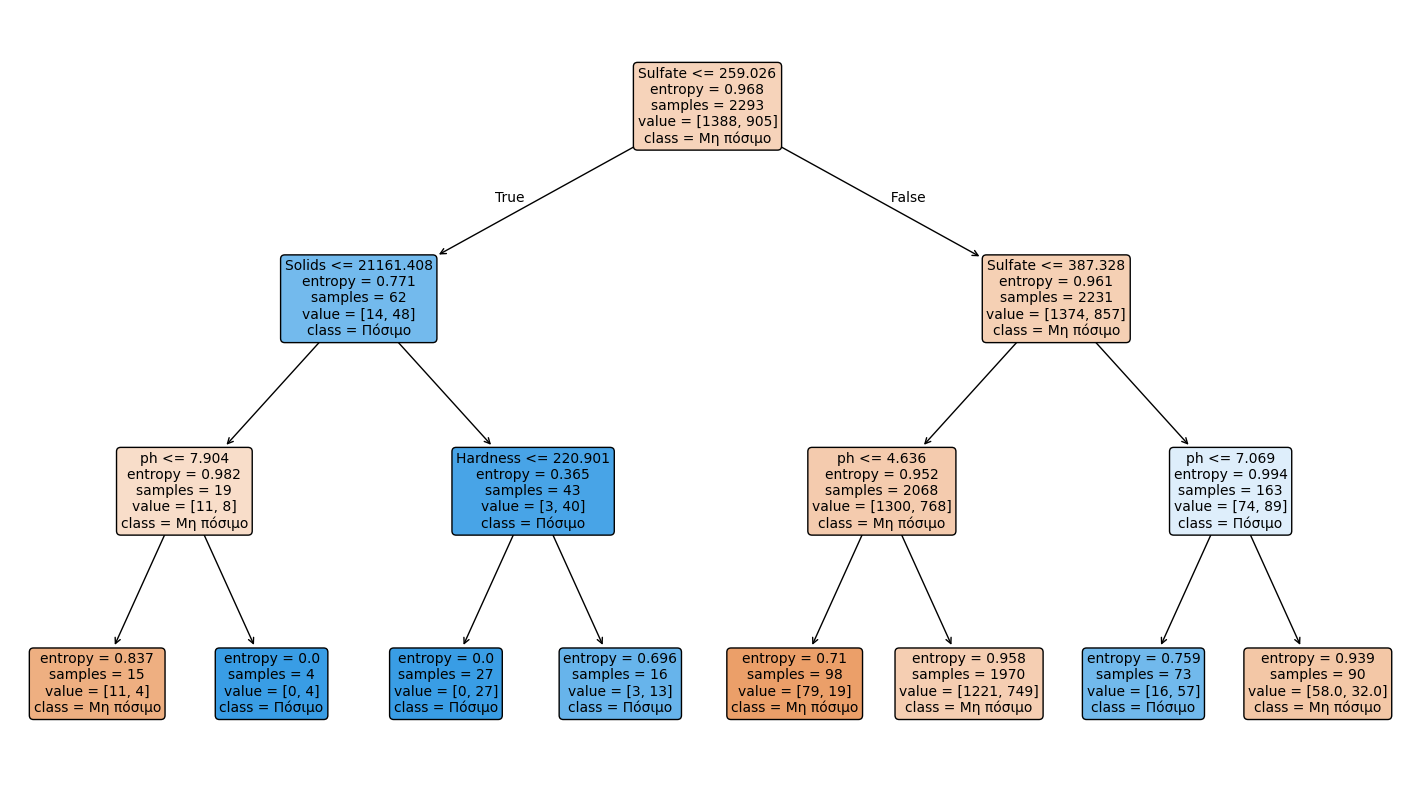

In [65]:
plt.figure(figsize=(18,10))
plot_tree(best_tree,
          feature_names=df.drop('Potability', axis=1).columns,
          class_names=['Μη πόσιμο', 'Πόσιμο'],
          filled=True, rounded=True, fontsize=10)
plt.show()

Από τη δομή του δέντρου απόφασης παρατηρείται ότι η πιο σημαντική μεταβλητή για τον αρχικό διαχωρισμό είναι η Sulfate, δηλαδή η συγκέντρωση θειικών ιόντων στο νερό. Οι μικρές τιμές της Sulfate (≤ 259) συνδέονται κυρίως με μη πόσιμο νερό, ενώ οι μέτριες ή υψηλότερες τιμές (> 259) συνδυασμένες με συγκεκριμένα επίπεδα pH και Hardness οδηγούν σε πόσιμο νερό. Επιπλέον παρατηρείται ότι τα δείγματα με πολύ χαμηλό pH (< 4.6) ταξινομούνται πάντα ως μη πόσιμα, ενώ ενδιάμεσες τιμές pH (6–7) σε συνδυασμό με επαρκή σκληρότητα ή περιεκτικότητα σε διαλυτά στερεά (Solids) αντιστοιχούν σε πόσιμο νερό.

# Ερώτημα 9

Εύρεση του συνδυασμού με τη μεγαλύτερη ακρίβεια στο test set

In [66]:
best_model_params = results_df.loc[results_df['test_acc'].idxmax()]
print("Καλύτερος συνδυασμός υπερπαραμέτρων:")
print(best_model_params)

Καλύτερος συνδυασμός υπερπαραμέτρων:
criterion             entropy
max_depth                 5.0
min_samples_split           2
min_samples_leaf            2
max_features             None
ccp_alpha                 0.0
train_acc            0.671173
test_acc             0.655137
Name: 84, dtype: object


Επανεκπαίδευση με αυτό τον συνδιασμό

In [67]:
final_tree = DecisionTreeClassifier(
    criterion=best_model_params['criterion'],
    max_depth=int(best_model_params['max_depth']),
    min_samples_split=int(best_model_params['min_samples_split']),
    min_samples_leaf=int(best_model_params['min_samples_leaf']),
    max_features=best_model_params['max_features'],
    ccp_alpha=best_model_params['ccp_alpha'],
    random_state=0
)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=np.float64(0.0), criterion='entropy',
                       max_depth=5, min_samples_leaf=2, random_state=0)

Υπολογισμός και εμφάνιση της σημαντικότητας χαρακτηριστικών

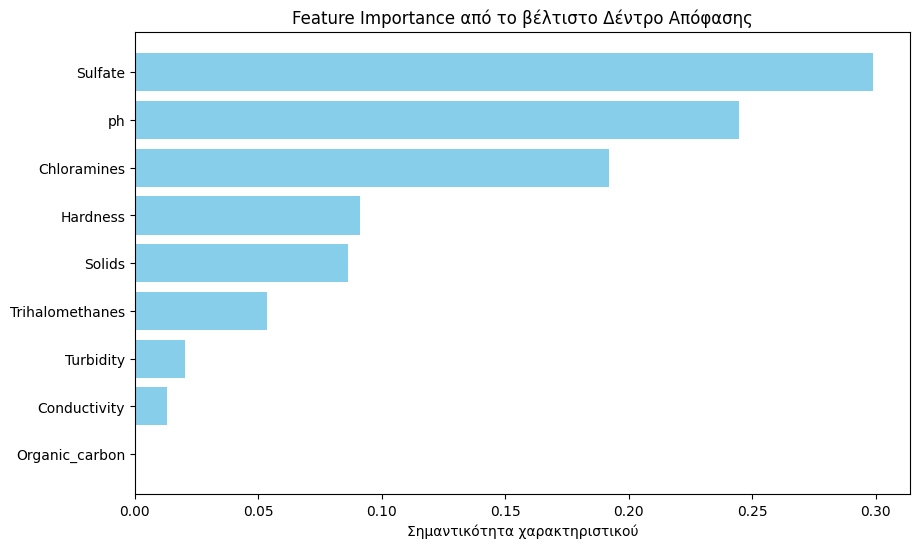

           Feature  Importance
4          Sulfate    0.298956
0               ph    0.244768
3      Chloramines    0.191956
1         Hardness    0.091392
2           Solids    0.086400
7  Trihalomethanes    0.053536
8        Turbidity    0.020127
5     Conductivity    0.012864
6   Organic_carbon    0.000000


In [68]:
feature_importances = pd.DataFrame({
    'Feature': df.drop('Potability', axis=1).columns,
    'Importance': final_tree.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10,6))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel('Σημαντικότητα χαρακτηριστικού')
plt.title('Feature Importance από το βέλτιστο Δέντρο Απόφασης')
plt.show()
print(feature_importances)

Από το ραβδόγραμμα της σημαντικότητας των χαρακτηριστικών προκύπτει ότι οι πέντε σημαντικότερες μεταβλητές για την πρόβλεψη της ποσιμότητας είναι (με σειρά σημαντικότητας) οι Sulfate, pH, Chloramines, Hardness και Solids. Οι παράμετροι αυτοί παρουσιάζουν τη μεγαλύτερη επιρροή στη διάκριση πόσιμου και μη πόσιμου νερού, καθώς σχετίζονται άμεσα με τη χημική σύσταση και την καθαρότητα του. Συνεπώς εαν η συσκευή μπορούσε να πραγματοποιήσει έως πέντε αναλύσεις θα έπρεπε να επιλεγούν τα παραπάνω χαρακτηριστικά, καθώς προσφέρουν τη μεγαλύτερη προβλεπτική ισχύ σύμφωνα με το δέντρο απόφασης.

#Ερώτημα 10

Ένα Τυχαίο Δάσος (Random Forest) μπορεί να επιτύχει καλύτερη ακρίβεια από ένα μεμονωμένο Δέντρο Απόφασης, επειδή αποτελεί συνδυασμό πολλών ανεξάρτητων δέντρων που εκπαιδεύονται σε διαφορετικά υποσύνολα των δεδομένων και των χαρακτηριστικών. Με αυτόν τον τρόπο μειώνει σημαντικά την υπερπροσαρμογή, καθώς εξομαλύνει τον θόρυβο και περιορίζει την επίδραση των λανθασμένων προβλέψεων κάθε επιμέρους δέντρου. Επιπλέον μειώνει τη διακύμανση, κάνοντας το μοντέλο πιο σταθερό και λιγότερο ευαίσθητο σε αλλαγές στα δεδομένα εκπαίδευσης. Η τυχαιότητα που εισάγεται τόσο στην επιλογή δειγμάτων όσο και χαρακτηριστικών ενισχύει τη γενίκευση του μοντέλου, αποτρέποντας την υπερβολική εξάρτηση από ένα μόνο χαρακτηριστικό. Τέλος ένα Τυχαίο Δάσος είναι πιο ανθεκτικό σε θορυβώδη δεδομένα και ακραίες τιμές, με αποτέλεσμα να προσφέρει συνολικά πιο αξιόπιστες και ακριβείς προβλέψεις σε σχέση με ένα Δέντρο Απόφασης.

#Ερώτημα 11

Δημιουργία και εκπαίδευση του Τυχαίου Δάσους

In [69]:
n_estimators_list = [50, 100, 200]
results_rf = []
for n in n_estimators_list:

    rf = RandomForestClassifier(
        n_estimators=n,
        random_state=0
    )
    rf.fit(X_train, y_train)
    train_acc = accuracy_score(y_train, rf.predict(X_train))
    test_acc = accuracy_score(y_test, rf.predict(X_test))

    results_rf.append({
        'n_estimators': n,
        'train_acc': train_acc,
        'test_acc': test_acc
    })
rf_results_df = pd.DataFrame(results_rf)
print(rf_results_df)

   n_estimators  train_acc  test_acc
0            50        1.0  0.693795
1           100        1.0  0.697864
2           200        1.0  0.689725


Τα αποτελέσματα δείχνουν ότι η ακρίβεια στο σύνολο ελέγχου (test_acc) κυμαίνονται μεταξύ 68.9% και 70.0%, με τη μέγιστη τιμή να παρατηρείται για 100 δέντρα (n_estimators = 100). Συνολικά το Τυχαίο Δάσος παρουσίασε σαφώς καλύτερη επίδοση σε σχέση με το Δέντρο Απόφασης το οποίο είχε ακρίβεια 57.48%, επιβεβαιώνοντας τη βελτίωση που προσφέρει η συνδυαστική εκπαίδευση πολλών δέντρων.

#Ερώτημα 12

Στην περίπτωση της πρόβλεψης της ποιότητας του νερού, είναι πολύ πιο σημαντικό το μοντέλο να προβλέπει σωστά το μη πόσιμο νερό, ακόμα κι αν αυτό σημαίνει ότι θα χάνει ακρίβεια στην πρόβλεψη του πόσιμου. Ο λόγος είναι οτι η λανθασμένη ταξινόμηση μη πόσιμου ως πόσιμου (ψευδώς θετικό αποτέλεσμα) μπορεί να έχει σοβαρές συνέπειες για την ανθρώπινη υγεία τόσο σε ατομικό όσο και συλλογικό επίπεδο. Αντίθετα το να χαρακτηριστεί το πόσιμο νερό ως μη πόσιμο (ψευδώς αρνητικό) είναι λιγότερο επικίνδυνο, καθώς απλά θα απορριφθεί νερό που στην πραγματικότητα ήταν ασφαλές. Επομένως το μοντέλο πρέπει να δίνει προτεραιότητα στην ανίχνευση του ακατάλληλου νερού με όσο το δυνατόν μεγαλύτερη ακρίβεια.

#Ερώτημα 13

Η επιλογή της νομικά ασφαλέστερης επιλογής αλγορίθμου εξαρτάται από το πλαίσιο εφαρμογής και τις προτεραιότητες που έχει η εκάστοτε εταιρεία, ωστόσο το δέντρο αποφάσεων θεωρείται γενικά πιο ασφαλές λόγω της υψηλής διαφάνειας και ερμηνευσιμότητάς του. Η απλότητά του επιτρέπει την πλήρη αιτιολόγηση των αποφάσεων, συμβάλλοντας στη συμμόρφωση με κανονισμούς όπως ο GDPR και στη μείωση νομικών κινδύνων. Αντίθετα το τυχαίο δάσος αν και πιο ακριβές και ανθεκτικό στην υπερεκπαίδευση, παρουσιάζει σοβαρά μειονεκτήματα σε θέματα διαφάνειας αυξάνοντας την πιθανότητα νομικής έκθεσης. Συνεπώς για εφαρμογές όπου απαιτείται δυνατότητα επεξήγησης και τεκμηρίωσης αποφάσεων το δέντρο αποφάσεων αποτελεί την ασφαλέστερη επιλογή, ενώ η χρήση τυχαίου δάσους προϋποθέτει την ενσωμάτωση εργαλείων εξήγησης τεχνητής νοημοσύνης και αυστηρών μηχανισμών ελέγχου.